In [14]:
%matplotlib widget

In [15]:
import xtrack as xt

import numpy as np
import matplotlib.pyplot as plt

In [16]:
collider = xt.Multiline.from_json(
    "../../xtrack/test_data/hllhc15_thick/hllhc15_collider_thick.json")
collider.build_trackers()
collider.vars.load_madx_optics_file(
    "../../xtrack/test_data/hllhc15_thick/opt_round_150_1500.madx")

Loading line from dict:   0%|          | 0/30281 [00:00<?, ?it/s]

Done loading line from dict.           


Loading line from dict:   0%|          | 0/30289 [00:00<?, ?it/s]

Done loading line from dict.           
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.


In [17]:
tw0_b1 = collider.lhcb1.twiss()

Found suitable prebuilt kernel `only_xtrack_frozen_energy`.


### Twiss on a part of the machine (bidirectional)

In [18]:
tw_81_12 = collider.lhcb1.twiss(start='e.ds.r8.b1', end='s.ds.l2.b1', init_at='ip1',
                    betx=0.15, bety=0.15)

Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `only_xtrack_backtrack_frozen_energy`.


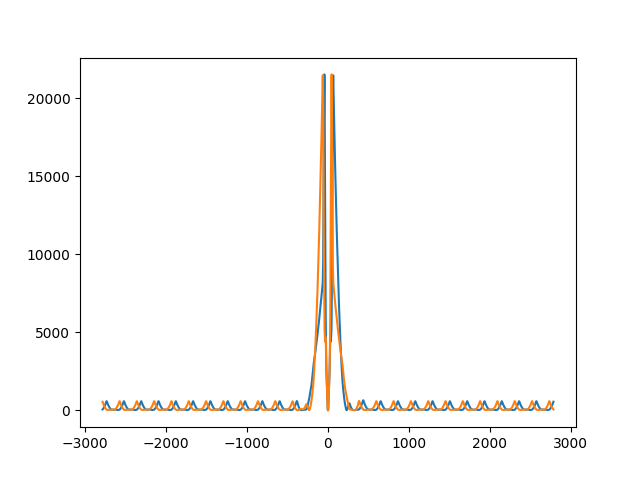

In [19]:
plt.figure()
plt.plot(tw_81_12.s, tw_81_12.betx)
plt.plot(tw_81_12.s, tw_81_12.bety)

If I rematch the optics in ir2 and ir8 to fulfill these boundary conditions, I will have a closed optics with the new $\beta^*$.

In [20]:
opt = collider.lhcb1.match(
    solve=False,
    default_tol={None: 1e-8, 'betx': 1e-6, 'bety': 1e-6},
    start='s.ds.l8.b1', end='ip1',
    init=tw0_b1, init_at=xt.START,
    targets=[
        xt.TargetSet(at='ip1', betx=0.15, bety=0.10, alfx=0, alfy=0, dx=0, dpx=0),
        xt.TargetSet(at='ip8', tars=('betx', 'bety', 'alfx', 'alfy', 'dx', 'dpx'), value=tw0_b1),
        xt.TargetRelPhaseAdvance('mux', value = tw0_b1['mux', 'ip1.l1'] - tw0_b1['mux', 's.ds.l8.b1']),
        xt.TargetRelPhaseAdvance('muy', value = tw0_b1['muy', 'ip1.l1'] - tw0_b1['muy', 's.ds.l8.b1']), 
    ],
        vary=[
            # Only IR8 quadrupoles
            xt.VaryList([
                'kq6.l8b1', 'kq7.l8b1', 'kq8.l8b1', 'kq9.l8b1', 'kq10.l8b1', 
                'kqtl11.l8b1', 'kqt12.l8b1', 'kqt13.l8b1',
                'kq4.l8b1', 'kq5.l8b1', 'kq4.r8b1', 'kq5.r8b1', 
                'kq6.r8b1', 'kq7.r8b1', 'kq8.r8b1', 'kq9.r8b1', 
                'kq10.r8b1', 'kqtl11.r8b1', 'kqt12.r8b1', 'kqt13.r8b1'])
        ]
)

In [21]:
opt.step(40)

In [22]:
opt.target_status()

Target status:                            
id state tag tol_met      residue  current_val  target_val description                                 
 0 ON           True  2.14802e-10         0.15        0.15 line=lhcb1, ('betx', 'ip1'), val=0.15, t ...
 1 ON           True -6.07431e-14          0.1         0.1 line=lhcb1, ('bety', 'ip1'), val=0.1, to ...
 2 ON           True  1.01752e-09  1.01752e-09           0 line=lhcb1, ('alfx', 'ip1'), val=0, tol= ...
 3 ON           True  8.00254e-13  8.00254e-13           0 line=lhcb1, ('alfy', 'ip1'), val=0, tol= ...
 4 ON           True -6.03062e-09 -6.03062e-09           0 line=lhcb1, ('dx', 'ip1'), val=0, tol=1e ...
 5 ON           True  8.22402e-09  8.22402e-09           0 line=lhcb1, ('dpx', 'ip1'), val=0, tol=1 ...
 6 ON           True  1.82212e-11          1.5         1.5 line=lhcb1, ('betx', 'ip8'), val=1.5, to ...
 7 ON           True -2.22045e-14          1.5         1.5 line=lhcb1, ('bety', 'ip8'), val=1.5, to ...
 8 ON           True 

In [24]:
# We match going backward in the line
opt = collider.lhcb1.match(
    solve=False,
    default_tol={None: 1e-8, 'betx': 1e-6, 'bety': 1e-6, 'alfx': 1e-6, 'alfy': 1e-6},
    start='ip1', end='e.ds.r2.b1',
    init=tw0_b1, init_at=xt.END,
    targets=[
        xt.TargetSet(at='ip1', betx=0.15, bety=0.10, alfx=0, alfy=0, dx=0, dpx=0),
        xt.TargetSet(at='ip2', tars=('betx', 'bety', 'alfx', 'alfy', 'dx', 'dpx'), value=tw0_b1),
        xt.TargetRelPhaseAdvance('mux', value = tw0_b1['mux', 'e.ds.r2.b1'] - tw0_b1['mux', 'ip1']),
        xt.TargetRelPhaseAdvance('muy', value = tw0_b1['muy', 'e.ds.r2.b1'] - tw0_b1['muy', 'ip1']),
    ],
    vary=[
        xt.VaryList([
            'kq9.l2b1', 'kq10.l2b1', 'kqtl11.l2b1', 'kqt12.l2b1', 'kqt13.l2b1',
            'kq9.r2b1', 'kq10.r2b1', 'kqtl11.r2b1', 'kqt12.r2b1', 'kqt13.r2b1',
            'kq4.l2b1', 'kq5.l2b1',  'kq6.l2b1', 'kq7.l2b1',   'kq8.l2b1',
            'kq6.r2b1',  'kq7.r2b1', 'kq8.r2b1', 'kq4.r2b1', 'kq5.r2b1'])
        ]
)

In [25]:
opt.step(20)

In [26]:
tw_after = collider.lhcb1.twiss()

In [ ]:
plt.figure()
plt.plot(tw0_b1.s, tw0_b1.bety)
plt.plot(tw_after.s, tw_after.bety, '--')